<a href="https://colab.research.google.com/github/arainbilal/colab_notebooks/blob/main/Ch2_Position%26Orientation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chapter 2: Representing position & orientation
Copyright (c) 2021- Peter Corke

In [ ]:
try:
    from google.colab import output
    print('Running on CoLab')
    output.enable_custom_widget_manager()
    !pip install ipympl
    !pip install spatialmath-python
    COLAB = True
    SWIFT = False
except ModuleNotFoundError:
    COLAB = False
    SWIFT = False
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"
from IPython.display import HTML

# standard imports
import numpy as np
from scipy import linalg
%matplotlib widget
import matplotlib.pyplot as plt
import math
from math import pi
np.set_printoptions(
    linewidth=120, formatter={
        'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"})
np.random.seed(0)
from spatialmath import *
from spatialmath.base import *

Running on CoLab
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.0/187.0 kB 3.4 MB/s eta 0:00:00


2.2.1.1 2D Rotation Matrix

We will create a SO(2) rotation matrix using the Teoolbox software

In [ ]:
R = rot2(0.3)

The angle is specified in readians. The rotation matrix can ebe visualized as  coordinate frame.

In [ ]:
plotvol2(new=True)  # for matplotlib/widget
trplot2(R);

2.2.2 Pose in Two Dimensions

In [ ]:
rot2(0.3)

The homogeneous transformation matrix for a rotation of 0.3 radiancs is:

In [ ]:
trot2(0.3)

Now we will compose two relative pose: a translation of (1,2) followed by a rotation of 30 degrees

In [ ]:
TA = transl2(1, 2) @ trot2(30, "deg")

array([[   0.866,     -0.5,        1],
       [     0.5,    0.866,        2],
       [       0,        0,        1]])

The function `transl2` creates a 2D relative pose with a finite translation but zero rotation. While `trot2` creates a relative pose with a finite rotation but zero translation. We can visualise this coordinate frame representing this pose relative to the reference frame as follows:

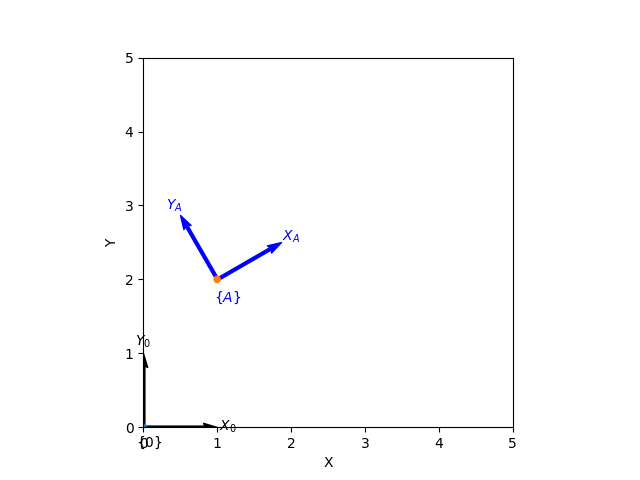

In [ ]:
plotvol2([0, 5], new=True); # new plot with both axes from 0 to 5
T0 = transl2(0, 0);
trplot2(T0, frame="0", color="k");  # reference frame
trplot2(TA, frame="A", color="b");